<a href="https://colab.research.google.com/github/AdaObioha/data-science-portfolio/blob/master/Titanic_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1>Titanic Survival Prediction</h1>

  

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we will build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

The training and testing datasets were obtained from [ Kaggle's Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data).

##<h2>Data Dictionary</h2>

*  Survival - 0=No, 1=Yes
*  pclass - Ticket class
*  sibsp - # of siblings/spouses aboard the Titanic
*  parch: # of parents/children aboard the Titanic
*  ticket: Ticket Number
*  fare: Passenger fare
*  cabin: Cabin number
*  embarked: Port of Embarkation; C = Cherbourg, Q= Queenstown, S= Southampton




##<h2>Import Data</h2>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
%matplotlib inline

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import datasets
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Titanic/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Titanic/test.csv')

In [ ]:
#for the purpose of running some operations on both datasets simultaneously
combine = [train_df,test_df]

##<h2>Exploratory Data Analysis</h2>

In [ ]:
#a peek at the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [ ]:
train_df.shape

(891, 12)

The training set has 891 entries and 12 rows. It contains 4 numerical variables and 4 categorical variables and 2 alphanumeric variables.

The test set has 418 entries and 11 columns as it is missing the 'Survived' column which we will be predicting.

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Data Wrangling

We want to check if any of the columns is missing data.

In [ ]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


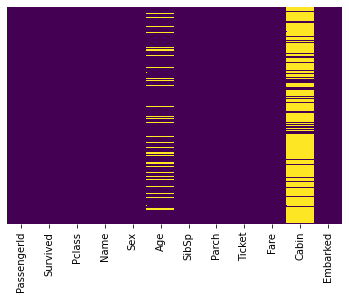

In [ ]:
sns.heatmap(train_df.isnull(), yticklabels=False,cbar=False, cmap ='viridis')

The "Age" column is missing 177 entries, the "Cabin" column is missing 687 (~77%) of the entries and the "Embarked" column is missing 2 entries. Let's examine the "age" column to make a better decision on how to complete the missing data.

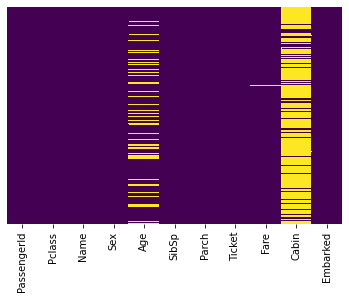

In [ ]:
sns.heatmap(test_df.isnull(), yticklabels=False,cbar=False, cmap ='viridis')

Most of the data from "Cabin" is missing so we can drop the entire column in both datasets. For this analysis we won't be making use of the names or ticket numbers so we'll drop those columns as well.

In [ ]:
for df in combine:
  df.drop(['Cabin','Ticket','Name'], axis=1, inplace=True)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


We suspect that age was a factor in determining the survival of passengers. We'll examine the age column to find out the best way to fill in the missing values. Based on the attributes of the age data, we can select the appropriate measure of central tendency to replace them.

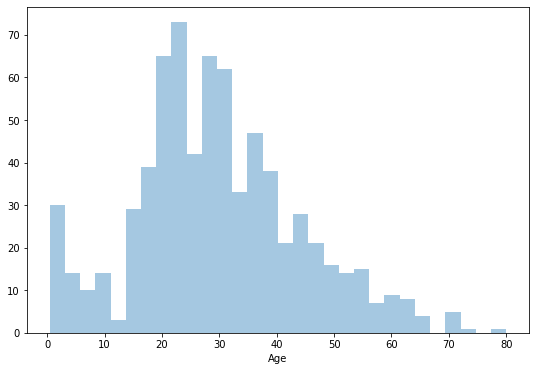

In [ ]:
#exploring the age distribution of passengers
plt.figure(figsize=(9,6))
ax = sns.distplot(train_df['Age'].dropna(),kde=False,bins=30)
ax.grid(False)

In [ ]:
#lets drop the rows missing the Age data and take a closer look at the column
train1 = train_df.drop(train_df[train_df['Age'].isnull()].index)
train1.shape

(714, 9)

In [ ]:
#group the passengers ages by their classes.
grouped = train1['Age'].groupby(train1['Pclass'])
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


It looks like there is a variation in the mean ages of the passengers in each class. We will need to find out how significant this variation is.

In [ ]:
#compare the mean age of each class using one-way ANOVA
stats.f_oneway(grouped.get_group(1),
               grouped.get_group(2),
               grouped.get_group(3))

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

There is a significant difference (p<0.05) in the mean of the ages of the passengers in each class. So we will be treating the classes separately instead of applying the same correction to all the missing data.

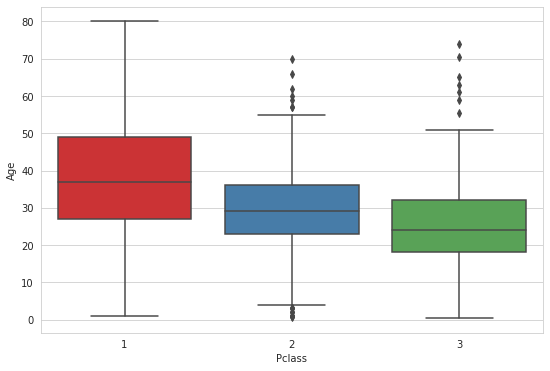

In [ ]:
#a closer look at the distribution within the passenger classes
plt.figure(figsize=(9,6))
sns.set_style('whitegrid')
sns.boxplot(x='Pclass', y='Age', data=train_df, palette="Set1")

There are a lot of outliers in 2nd and 3rd classes. Median is a better measure of central tendency and will be used to replace the missing values for age.

In [ ]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else: 
            return 24
    else:
        return Age

In [ ]:
for df in combine: 
  df['Age'] = df[['Age','Pclass']].apply(input_age, axis =1)

Lastly, for the **Embarked** column we'll just drop to two rows with missing data to ensure the accuracy of our prediction model.

In [ ]:
train_df.dropna(axis=0, inplace=True)

In [ ]:
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [ ]:
train_df.shape

(889, 9)

##Who were the passengers on the Titanic?

Now that we've taken care of the missing data, let's explore the composition of passengers.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


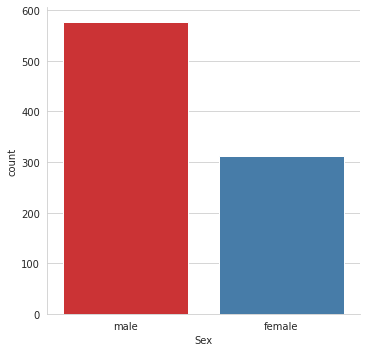

In [ ]:
sns.set_style('whitegrid')
sns.factorplot('Sex',data=train_df,kind='count', palette='Set1')

There were almost twice as many men as there were women on the ship. The dataset does not state which of the passengers were children. We will need to create a column that identifies the children separately from the men and women.

In [ ]:
def sex_age(passenger):
    age=passenger['Age']
    sex=passenger['Sex']
    return 'child' if age < 16 else sex

for df in combine: 
  df['Person'] = df.apply(sex_age,axis=1)

Let's take a look at the data again

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


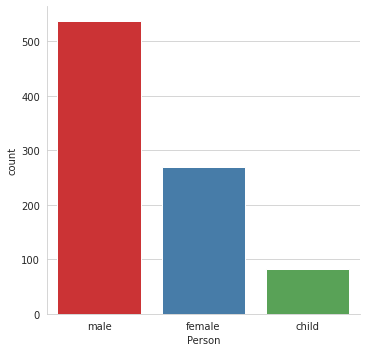

In [ ]:
sns.factorplot('Person',data=train_df,kind='count', palette='Set1')

There were more men than women and children combined on the ship. Let's se if this holds true across the classes.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


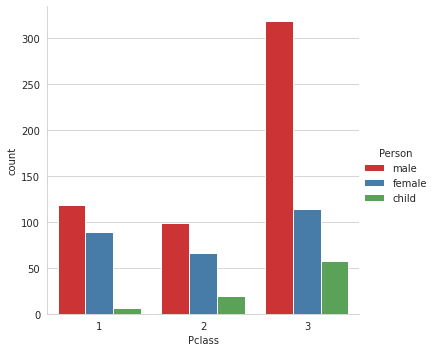

In [ ]:
sns.factorplot('Pclass',data=train_df,hue= 'Person',kind='count', palette="Set1")

The men outnumbered the women and children in each class. There were more men in third class than there were in first and second class combined. Notably, most of the women and children were in third class as well.

**Family Size**

Family size may have also played a role in determining who survived or didn't. A passenger might have been more likely to survive if they had other family members with them. The **SibSP** column refers to the number of sibling and spouses aboard the ship while the **Parch** column refers to the number of parents and children on the ship.

Let us use those columns to create an additional one that indicates whether a passenger was alone or not.

In [ ]:
for df in combine:
  df['FamilySize'] = df.SibSp + df.Parch

In [ ]:
def IsAlone(passenger):
  is_alone = passenger['FamilySize']
  return "Yes" if is_alone ==0 else "No"

for df in combine: 
  df['Alone'] = df.apply(IsAlone,axis=1)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person,FamilySize,Alone
0,1,0,3,male,22.0,1,0,7.2500,S,male,1,No
1,2,1,1,female,38.0,1,0,71.2833,C,female,1,No
2,3,1,3,female,26.0,0,0,7.9250,S,female,0,Yes
3,4,1,1,female,35.0,1,0,53.1000,S,female,1,No
4,5,0,3,male,35.0,0,0,8.0500,S,male,0,Yes


We can now drop the **SibSp** and **Parch** columns and they are no longer relevant in our study.

In [ ]:
for df in combine:
  df.drop(['SibSp','Parch',], axis=1, inplace=True)

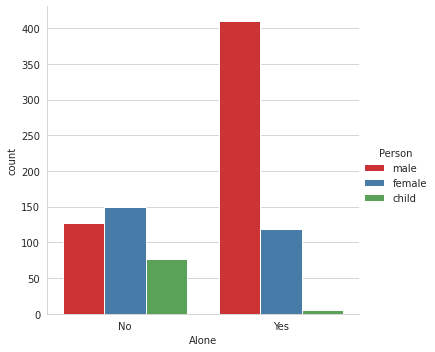

In [ ]:
sns.catplot('Alone',data=train_df,hue = 'Person', kind='count',palette="Set1")

As expected, almost all the children were accompanied. This might have increased their chances of survival. It is a bit odd though that there were some children that travelled without a parent or sibling. We can also see that most of the men travelled alone.

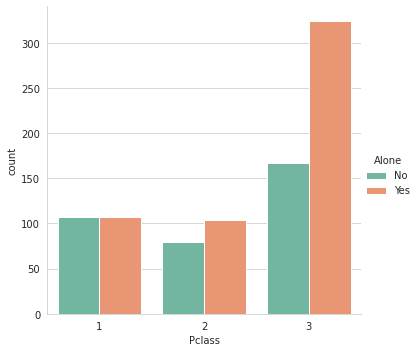

In [ ]:
sns.catplot('Pclass',data=train_df,hue = 'Alone', kind='count',palette="Set2")

Most of the people that travelled alone were in third class. So far, majority of the passengers appear to be men in third class that travelled without family (eg. Jack from the movie Titanic).

**Embarkation**

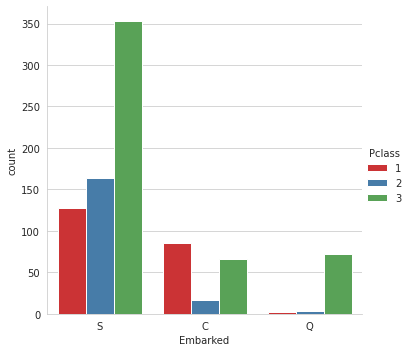

In [ ]:
sns.catplot('Embarked',data=train_df,hue='Pclass',kind='count', palette="Set1")

Most of the passengers embarked at Southampton. Most of the passengers from Cherbourg sailed first class even though the third class passengers out number the other classes on the ship overall.
Almost all the passengers that embarked at Queenstown were in third class.
This could be indicative of the socio-economic status of the residents of Queenstown.

##Who had a higher chance of survival?

We're now going to explore each of the factors (ie name, age, gender, socio-economic class, etc) to see how they impacted the passengers' chance of survival.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


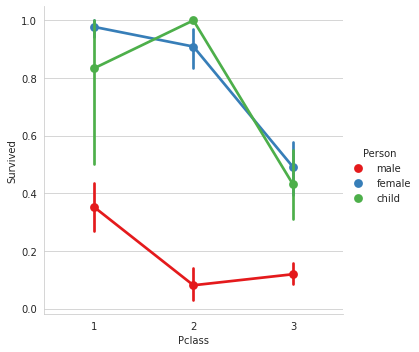

In [ ]:
sns.factorplot('Pclass','Survived',hue='Person',data=train_df, palette='Set1')

Sex, class and likely age appear to have been deciding factors for survival. Men had the least chance of survival when compared to women and children. The passengers in first class had a higher chance of survival compared to all other passengers on the ship. The women and children in third class also had a considerably lower chance of survival than their counterparts in first and second class.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


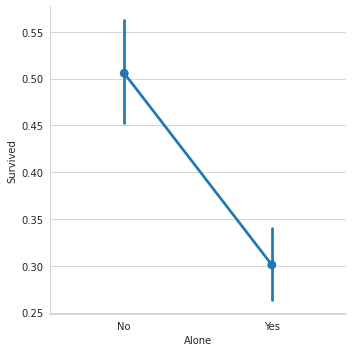

In [ ]:
sns.factorplot('Alone','Survived',data=train_df)

The passengers that travelled with family members had a better chance than those who travelled alone. So far, we have seen that the men in third class that travelled alone and constituted the majority of the passengers had the odds against them. They had the least chance of survival.

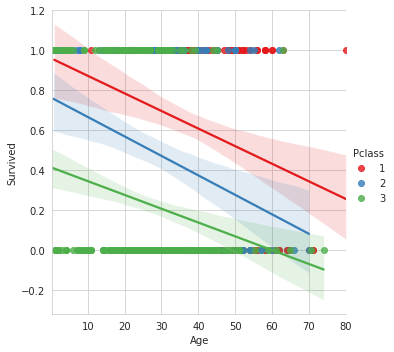

In [ ]:
sns.lmplot('Age','Survived',hue='Pclass',data=train_df, palette="Set1")

Across all the classes, age played a role in determining survival. Older people had a lower chance of survival than the younger ones most especially the children.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


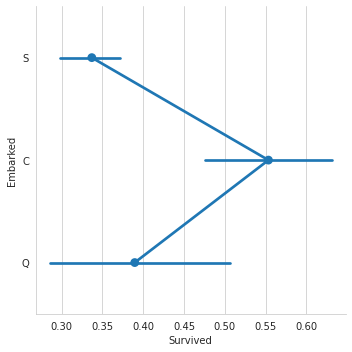

In [ ]:
sns.factorplot('Survived', 'Embarked', data=train_df)

Passengers that embarked at Cherbourg had the highest chance of survival when compared with passengers from other ports. This is likely because most of them travelled first class as seen earlier.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


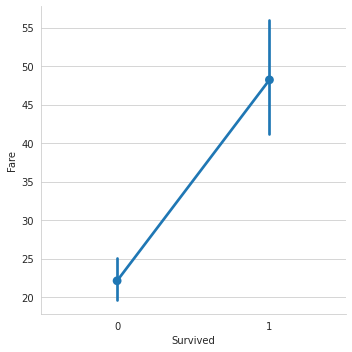

In [ ]:
sns.factorplot('Survived', 'Fare', data=train_df)

As expected, passengers that paid the highest fares were most likely to survive as they would have been in a higher class than those who paid lower fares.

In [ ]:
# Creating different datasets for survivors and non-survivors to enable comparison
survivors_df = train_df[train_df['Survived'] == 1]
nonsurvivors_df = train_df[train_df['Survived'] == 0]

print('The number of survivors is:',len(survivors_df))
print('The number of non-survivors is:',len(nonsurvivors_df))

The number of survivors is: 340
The number of non-survivors is: 549


In [ ]:
#survivors
women = train_df.loc[train_df.Person == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_df.loc[train_df.Person == 'male']["Survived"]
rate_men = sum(men)/len(men)

children = train_df.loc[train_df.Person == 'child']["Survived"]
rate_child = sum(children)/len(children)

In [ ]:
print("% of women who survived:", rate_women*100, "%")
print("% of men who survived:", rate_men*100, "%")
print("% of children who survived:", rate_child*100, "%")

% of women who survived: 75.46468401486989 %
% of men who survived: 16.387337057728118 %
% of children who survived: 59.036144578313255 %


In [ ]:
print("% of survivors that were women:",(sum(women)/len(survivors_df))*100,"%")
print("% of survivors that were men:",(sum(men)/len(survivors_df))*100,"%")
print("% of survivors that were children:",(sum(children)/len(survivors_df))*100,"%")

% of survivors that were women: 59.705882352941174 %
% of survivors that were men: 25.882352941176475 %
% of survivors that were children: 14.411764705882351 %


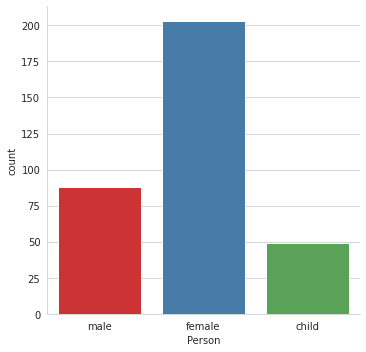

In [ ]:
sns.catplot('Person',data=survivors_df,kind='count',order = ['male','female','child'], palette='Set1')

Based on this training data, almost 60% of the survivors were women even though women constituted about 30% of passengers onboard. Survival chances were rigged in favour of women and children as 75% of women and 59% of children survived compared to 16% of men.

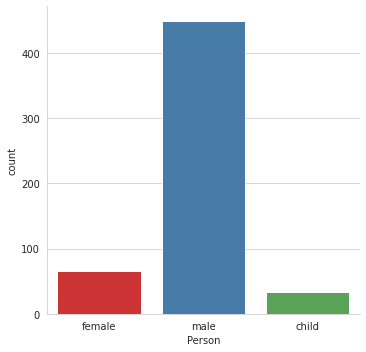

In [ ]:
sns.catplot('Person',data=nonsurvivors_df,kind='count', order = ['female','male','child'], palette='Set1')

As expected, approxiamtely 85% of the passengers that died were men (RIP Jack). Children were in the minority on the ship and made up 5% of the passnegers that died.

##Survival Prediction

So far, we have established that passengers' age, sex, point of embarkation, class and whether or not they were alone were contributing factors to determining their survival. Now we are going to create a model that takes in these features and predicts whether or not a passenger in the test set survived the shipwreck.

In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Person,FamilySize,Alone
0,892,3,male,34.5,7.8292,Q,male,0,Yes
1,893,3,female,47.0,7.0000,S,female,1,No
2,894,2,male,62.0,9.6875,Q,male,0,Yes
3,895,3,male,27.0,8.6625,S,male,0,Yes
4,896,3,female,22.0,12.2875,S,female,2,No


In [ ]:
print(test_df.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Person         0
FamilySize     0
Alone          0
dtype: int64


One row is missing data from the **Fare** column so we'll replace it with the median value.

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

To further prepare the **Fare** data to be fed to our model, we'll categorize the passenger's fares seeing as they correspond to the class they travelled in.

In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.577273


In [ ]:
for df in combine:
    df.loc[df['Fare'] <= 7.896, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.896) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare'] = 2
    df.loc[df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
    
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Person,FamilySize,Alone
0,1,0,3,male,22.0,0,S,male,1,No
1,2,1,1,female,38.0,3,C,female,1,No
2,3,1,3,female,26.0,1,S,female,0,Yes
3,4,1,1,female,35.0,3,S,female,1,No
4,5,0,3,male,35.0,1,S,male,0,Yes


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Person,FamilySize,Alone
0,892,3,male,34.5,0,Q,male,0,Yes
1,893,3,female,47.0,0,S,female,1,No
2,894,2,male,62.0,1,Q,male,0,Yes
3,895,3,male,27.0,1,S,male,0,Yes
4,896,3,female,22.0,1,S,female,2,No


In [ ]:
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Alone'] = test_df['Alone'].map( {'No': 0, 'Yes': 1} ).astype(int)
test_df['Person'] = test_df['Person'].map( {'male': 0, 'female': 1, 'child': 2} ).astype(int)

train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df['Alone'] = train_df['Alone'].map( {'No': 0, 'Yes': 1} ).astype(int)
train_df['Person'] = train_df['Person'].map( {'male': 0, 'female': 1, 'child': 2} ).astype(int)


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Person,FamilySize,Alone
886,887,0,2,male,27.0,1,0,0,0,1
887,888,1,1,female,19.0,2,0,1,0,1
888,889,0,3,female,24.0,2,0,1,3,0
889,890,1,1,male,26.0,2,1,0,0,1
890,891,0,3,male,32.0,0,2,0,0,1


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Person,FamilySize,Alone
0,892,3,male,34.5,0,2,0,0,1
1,893,3,female,47.0,0,0,1,1,0
2,894,2,male,62.0,1,2,0,0,1
3,895,3,male,27.0,1,0,0,0,1
4,896,3,female,22.0,1,0,1,2,0


Next, we'll need to separate the target variable (the value we are predicting) from the independent variables in order to train a machine learning model. We will also need to narrow down our choices of algorithms to the ones that are suitable for our prediction. Since we are trying to predict a binary outcome (Survival: 1= Yes, 0=No) using supervised learning, our primary choices will be classification algorithms.

In [ ]:
y_train = train_df["Survived"]

In [ ]:
features = ["Pclass", "Person", "Alone", "Embarked", "Fare","Age"]

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree

In [ ]:
X_train = train_df[features]
X_test = test_df[features]

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)


#X_train = std_scale.transform(X_train)
#X_test = std_scale.transform(X_test)

In [ ]:
classifiers = []

model1 = LogisticRegression()
classifiers.append(model1)

model2 = svm.SVC()
classifiers.append(model2)

model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)

model4 = RandomForestClassifier()
classifiers.append(model4)

model5 = KNeighborsClassifier()
classifiers.append(model5)

In [ ]:
# make predictions and score the performance of each model using the training data
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = round(clf.score(X_train, y_train) * 100, 2)
    print("Accuracy of %s is %s"%(clf, acc))

Accuracy of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is 79.19
Accuracy of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 64.9
Accuracy of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
   

Random Forest Classifier scored the highest among the five algorithms used. We will use the predictions from this model for the submission

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('/content/drive/My Drive/Colab Notebooks/Titanic/titanic_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
